First do an Earthquake simulation 

In [1]:
%cd Simple1DOF

/home/tomsimpson/Documents/ETHwork/DynSub/Simple1DOF


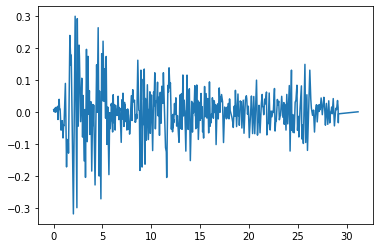

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.io import loadmat
from math import sqrt


os.getcwd()
Ag = loadmat('ElCentro.mat')
Ag = Ag['Ag']

plt.plot(Ag[:,0],Ag[:,1])



In [3]:
def f(y, t, params):
    y1, y2 = y
    k, c, m, knl, Ag, ts = params
    i = int(t/ts)
    ag=Ag[i,1]
    derivs=[y2,
           (-m*ag*9.81-knl*y1**3-k*y1-c*y2)/m]
    return derivs

tStop = 31.2
ts = 0.02
t = np.arange(0., tStop, ts)
nt = len(t)


np.random.seed(1)
#Parameters
k = (176.75+1224.1)*1e6
m = 1.75e6
c = 0.04*sqrt(k*m)
knl = 10e12
#knl=0
params=[k, c, m, knl, Ag, ts]

#Initial values
y1_0=0
y2_0=0
y0 = [y1_0, y2_0]

psoln = odeint(f, y0, t, args=(params,))

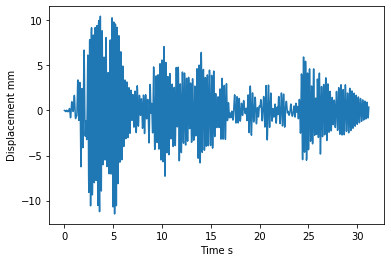

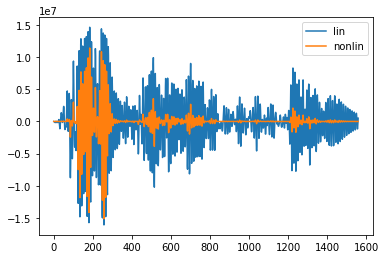

In [4]:
plt.figure(0)
plt.plot(Ag[:,0],1000*psoln[:,0])
plt.xlabel('Time s')
plt.ylabel('Displacement mm')

plt.figure(1)
plt.plot(k*psoln[:,0],label='lin')
plt.plot(knl*psoln[:,0]**3,label='nonlin')
plt.legend()

In [5]:
F_exp = -(psoln[:,0:1]**3)*10e12
ExInps = np.concatenate((Ag[:,1:],F_exp),axis=1)
X = psoln[:,0:1]


In [6]:
f_train = ExInps[0:1000,:]
f_test = ExInps[:,:]

x_train = X[0:1000,:]
x_test = X[:,:]

datasetTrain = np.concatenate((f_train,x_train),axis=1)
datasetTest=np.concatenate((f_test,x_test),axis=1)

def create_dataset(dataset, look_back=6):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 2:])
    return np.array(X), np.array(Y)

f_train, x_train = create_dataset(datasetTrain)
f_test, x_test = create_dataset(datasetTest)


1.1337927271810334e-07


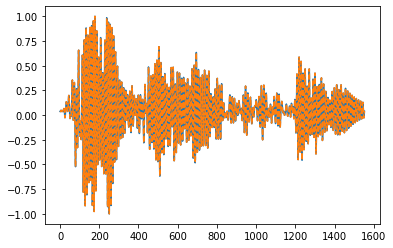

In [7]:
## One Step Ahead Prediction

f_train.shape
f_train = np.reshape(f_train,(f_train.shape[0],-1))
f_test = np.reshape(f_test,(f_test.shape[0],-1))
fmax=f_test.max(axis=0,keepdims=True)
fmin=f_test.min(axis=0,keepdims=True)
f_test_norm=2*(f_test-fmin)/(fmax-fmin)-1


xmax=x_test.max(axis=0,keepdims=True)
xmin=x_test.min(axis=0,keepdims=True)
x_test_norm=2*(x_test-xmin)/(xmax-xmin)-1

f_train_norm = f_test_norm[:1000,:]
x_train_norm = x_test_norm[:1000,:]



dispmax = fmax[:,2]
dispmin = fmin[:,2]

forcemax = fmax[:,1]
forcemin = fmin[:,1]

params = [dispmax, dispmin, forcemax, forcemin]


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(f_train_norm, x_train_norm)
#print(reg.score(f_train_norm,x_train_norm))
#print(reg.score(f_test_norm,x_test_norm))

yy = reg.predict(f_test_norm)

plt.plot(yy)
plt.plot(x_test_norm,'--')

from sklearn.metrics import mean_squared_error
print(mean_squared_error(yy,x_test_norm))

18
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1553 samples
Epoch 1/2000
1000/1000 [==============================] - 1s 594us/step - loss: 4.5597e-06 - val_loss: 2.9617e-06

Epoch 00001: val_loss improved from inf to 0.00000, saving model to .mdl_wts_nl.hdf5
Epoch 2/2000
1000/1000 [==============================] - 0s 55us/step - loss: 3.9574e-06 - val_loss: 3.1074e-06

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/2000
1000/1000 [==============================] - 0s 47us/step - loss: 4.2462e-06 - val_loss: 3.5169e-06

Epoch 0000

1000/1000 [==============================] - 0s 30us/step - loss: 3.8169e-06 - val_loss: 2.9922e-06

Epoch 00046: val_loss did not improve from 0.00000
Epoch 47/2000
1000/1000 [==============================] - 0s 27us/step - loss: 3.8792e-06 - val_loss: 3.1320e-06

Epoch 00047: val_loss did not improve from 0.00000
Epoch 48/2000
1000/1000 [==============================] - 0s 21us/step - loss: 3.7467e-06 - val_loss: 2.9558e-06

Epoch 00048: val_loss did not improve from 0.00000
Epoch 49/2000
1000/1000 [==============================] - 0s 20us/step - loss: 3.8397e-06 - val_loss: 3.1266e-06

Epoch 00049: val_loss did not improve from 0.00000
Epoch 50/2000
1000/1000 [==============================] - 0s 22us/step - loss: 3.7365e-06 - val_loss: 2.9739e-06

Epoch 00050: val_loss did not improve from 0.00000
Epoch 51/2000
1000/1000 [==============================] - 0s 22us/step - loss: 3.8556e-06 - val_loss: 3.1748e-06

Epoch 00051: val_loss did not improve from 0.00000
Epoch 52/2000
1000

1000/1000 [==============================] - 0s 24us/step - loss: 3.9117e-06 - val_loss: 3.4998e-06

Epoch 00095: val_loss did not improve from 0.00000
Epoch 96/2000
1000/1000 [==============================] - 0s 31us/step - loss: 4.5850e-06 - val_loss: 3.0538e-06

Epoch 00096: val_loss did not improve from 0.00000
Epoch 97/2000
1000/1000 [==============================] - 0s 24us/step - loss: 4.0756e-06 - val_loss: 3.9726e-06

Epoch 00097: val_loss did not improve from 0.00000
Epoch 98/2000
1000/1000 [==============================] - 0s 27us/step - loss: 5.5650e-06 - val_loss: 3.2133e-06

Epoch 00098: val_loss did not improve from 0.00000
Epoch 99/2000
1000/1000 [==============================] - 0s 26us/step - loss: 4.0312e-06 - val_loss: 3.3855e-06

Epoch 00099: val_loss did not improve from 0.00000
Epoch 100/2000
1000/1000 [==============================] - 0s 24us/step - loss: 4.2905e-06 - val_loss: 3.1297e-06

Epoch 00100: val_loss did not improve from 0.00000
Epoch 101/2000
10

1000/1000 [==============================] - 0s 26us/step - loss: 3.9177e-06 - val_loss: 3.2136e-06

Epoch 00144: val_loss did not improve from 0.00000
Epoch 145/2000
1000/1000 [==============================] - 0s 25us/step - loss: 4.0251e-06 - val_loss: 3.3939e-06

Epoch 00145: val_loss did not improve from 0.00000
Epoch 146/2000
1000/1000 [==============================] - 0s 22us/step - loss: 3.9346e-06 - val_loss: 3.2071e-06

Epoch 00146: val_loss did not improve from 0.00000
Epoch 147/2000
1000/1000 [==============================] - 0s 24us/step - loss: 3.9952e-06 - val_loss: 3.3911e-06

Epoch 00147: val_loss did not improve from 0.00000
Epoch 148/2000
1000/1000 [==============================] - 0s 24us/step - loss: 3.9015e-06 - val_loss: 3.2246e-06

Epoch 00148: val_loss did not improve from 0.00000
Epoch 149/2000
1000/1000 [==============================] - 0s 23us/step - loss: 4.0330e-06 - val_loss: 3.4329e-06

Epoch 00149: val_loss did not improve from 0.00000
Epoch 150/200

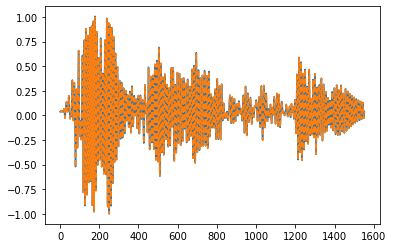

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import normalize
import keras




usualCallback = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience = 150)
checkpoint = ModelCheckpoint('.mdl_wts_nl.hdf5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
callbacks_list = [usualCallback, checkpoint]

print(f_train.shape[1])

nn = Sequential()
nn.add(Dense(10,input_dim = f_train.shape[1], activation='tanh'))
nn.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam(lr=0.0002)
nn.compile(loss='mean_squared_error', optimizer=opt)

nn.summary()

nn.load_weights('.mdl_wts_nl.hdf5')
nn.fit(f_train_norm,x_train_norm,validation_data=(f_test_norm,x_test_norm) ,epochs=2000, batch_size=64, callbacks=callbacks_list,shuffle=False)

nn.load_weights('.mdl_wts_nl.hdf5')
print(nn.evaluate(f_test_norm,x_test_norm))

yhat = nn.predict(f_test_norm)
plt.plot(yhat)
plt.plot(x_test_norm,'--')

print(mean_squared_error(yhat,x_test_norm))

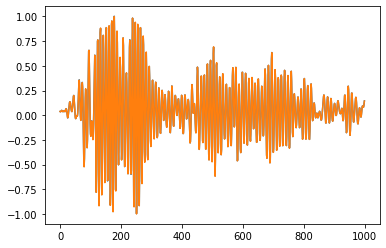

In [23]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
yhat = nn.predict(f_train_norm)
plt.plot(yhat)
plt.plot(x_train_norm)

(1500, 18)
(1553, 18)
0.0037723016536046925


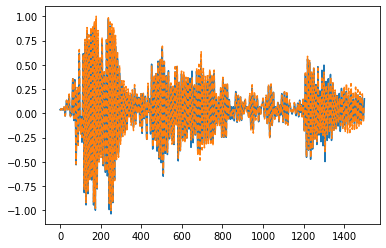

In [30]:
### Simulation with "Hybrid Test" i.e. at each time point the input given is the AR input + ground acceleration
### along with the exogenous forcing which is calculated from the "Physical System"

%matplotlib inline
import mpld3
mpld3.enable_notebook()


'''
def sim_pred(mdl, AG, X0, steps):
    Xhat = X0
    y = []
    Xstore = []
    for i in range(steps):
        #print(Xhat)
        Yhat = mdl.predict(Xhat)
        #RestForce = -Yhat*1224.1e6
        RestForce  = -Yhat
        #print(Yhat)
        y.append(Yhat)
        Xstore.append(Xhat)
        Xhat = Xhat[:,-3:]
        Xhat = np.concatenate((Xhat,AG[i+2:i+3,0:]),axis=1)
        Xhat = np.concatenate((Xhat,RestForce),axis=1)
        Xhat = np.concatenate((Xhat,Yhat),axis=1)   
        #print(Xhat.shape)
    
    
    return(y, Xstore)
'''

def sim_pred(mdl, AG, X0, steps, params):
    Xhat = X0
    y = []
    Xstore = []
    dispmax, dispmin, forcemax, forcemin = params
    for i in range(steps):
        #print(Xhat)
        Yhat = mdl.predict(Xhat)
        #RestForce = -Yhat*1224.1e6
        #RestForce  = -Yhat**3
        y_un = dispmin + (-Yhat+1)*(dispmax-dispmin)/2
        RestForce_un = (y_un**3)*10e12
        RestForce = 2*(RestForce_un-forcemin)/(forcemax-forcemin)-1
        #print(Yhat)
        y.append(Yhat)
        Xstore.append(Xhat)
        Xhat = Xhat[:,-15:]
        Xhat = np.concatenate((Xhat,AG[i+6:i+7,0:]),axis=1)
        Xhat = np.concatenate((Xhat,RestForce),axis=1)
        Xhat = np.concatenate((Xhat,Yhat),axis=1)   
        #print(Xhat.shape)
    
    
    return(y, Xstore)
    
nn.load_weights('notbad.hdf5')
(y, Xstore)= sim_pred(nn, f_test_norm[:,0:1], f_train_norm[0:1,:], 1500, params)

Xstore = np.asarray(Xstore)
Xstore = np.squeeze(Xstore)
print(Xstore.shape)

print(f_test.shape)
'''
plt.plot(Xstore[:,1])
plt.plot(f_test_norm[:,1])
'''



y = np.asarray(np.squeeze(y))
plt.plot(y[:])
plt.plot(x_test_norm[:1498],'--')


print(mean_squared_error(y[0:],x_test_norm[:y.shape[0]]))

nn.save_weights('notbad.hdf5')



In [47]:
X0 = f_test_norm[0:1,:]
Yhat1 = nn.predict(X0)
Y1 = x_test_norm[0]


yy=[]

y_un = dispmin + (Yhat1+1)*(dispmax-dispmin)/2
RestForce_un = (y_un**3)*10e12
RestForce = 2*(RestForce_un-forcemin)/(forcemax-forcemin)-1
#print(Yhat)
yy.append(Yhat1)
i=0

Xhat1 = X0[:,-15:]
Xhat1 = np.concatenate((Xhat1,f_test_norm[i+6:i+7,0:1]),axis=1)
Xhat1 = np.concatenate((Xhat1,RestForce),axis=1)
Xhat1 = np.concatenate((Xhat1,Yhat1),axis=1)   


X1 = f_test_norm[1:2,:]

np.set_printoptions(suppress=True)


Yhat2 = nn.predict(Xhat1)
Y2 = x_test_norm[1]

print(Yhat2)
print(Y2)


y_un = dispmin + (Yhat2+1)*(dispmax-dispmin)/2
RestForce_un = (y_un**3)*10e12
RestForce = 2*(RestForce_un-forcemin)/(forcemax-forcemin)-1
#print(Yhat)
yy.append(Yhat2)
i=1

Xhat2 = Xhat1[:,-15:]
Xhat2 = np.concatenate((Xhat2,f_test_norm[i+6:i+7,0:1]),axis=1)
Xhat2 = np.concatenate((Xhat2,RestForce),axis=1)
Xhat2 = np.concatenate((Xhat2,Yhat2),axis=1)   



Yhat3 = nn.predict(Xhat2)
y_un = dispmin + (Yhat3+1)*(dispmax-dispmin)/2
RestForce_un = (y_un**3)*10e12
RestForce = 2*(RestForce_un-forcemin)/(forcemax-forcemin)-1
#print(Yhat)
yy.append(Yhat3)
i=2

Xhat3 = Xhat2[:,-15:]
Xhat3 = np.concatenate((Xhat3,f_test_norm[i+6:i+7,0:1]),axis=1)
Xhat3 = np.concatenate((Xhat3,RestForce),axis=1)
Xhat3 = np.concatenate((Xhat3,Yhat2),axis=1)   

print(Xhat3)
print(f_test_norm[3:4,:])

[[0.03606437]]
[0.03531484]
[[ 0.04696943 -0.13996696  0.0413059   0.05766271 -0.13996682  0.04008241
   0.06832359 -0.13996663  0.0389513   0.05520001 -0.13996792  0.03769427
   0.04207644 -0.13996841  0.03606437  0.02895287 -0.13996837  0.03606437]]
[[ 0.04696943 -0.13996696  0.0413059   0.05766271 -0.13996682  0.04008241
   0.06832359 -0.13996663  0.0389513   0.05520001 -0.1399662   0.03712391
   0.04207644 -0.13996558  0.03531484  0.02895287 -0.13996565  0.03547679]]


In [12]:
X0 = f_train[0:1,:]
#print(X0)
#print(Xstore[0])
print(f_train[1:2,:])
print(Xstore[1])
print(Ag.shape)

[[ 3.64000000e-03  1.46206320e+04 -1.19439849e-05  9.90000000e-04
   4.73670625e+04 -3.86954191e-05]]
[[ 0.04489558  0.0420696  -0.0420696   0.03630855  0.04611788 -0.04611788]]
(1560, 2)


[[ 3.64000000e-03  1.46206320e+04 -1.19439849e-05  9.90000000e-04
   4.73670625e+04 -3.86954191e-05]]
[[ 3.64000000e-03  1.46206324e+04 -1.19439853e-05  9.90000000e-04
   1.89547200e+06 -1.54846173e-03]]
0.0
[[ 0.05351501  0.04055207 -0.04055207  0.04489558  0.0420711  -0.0420711 ]]


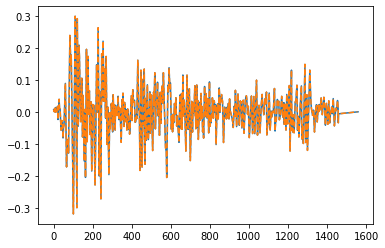

In [373]:
'''
X0 = f_train[0:1,:]
print(X0)
print(Xstore[0])
'''
print(f_train[1:2,:])
print(Xstore[1])

plt.plot(Ag[:,1])
#plt.plot(f_test[:,1])
plt.plot(f_test[:,0],'--')
print(mean_squared_error(f_test[:1000,0],Ag[:1000,1]))
print(f_train_norm[0:1,:])

In [22]:
X0 = f_train_norm[0:1,:]
yhat1 = nn.predict(X0)
print(yhat1)
print(x_train_norm[0])

X1 = f_train_norm[1:2,:]
print(X1)
X1hat = X1
X1hat[0,-1] = yhat1
X1hat[0,-2] = -yhat1
print(X1hat)

yhat2 = nn.predict(X1hat)
print(yhat2)
print(x_train_norm[1])

X2hat = f_train_norm[2:3,:]
X2hat[0,-1] = yhat2
X2hat[0, -2] = -yhat2

yhat3 = nn.predict(X2hat)
print(yhat3)
print(x_train_norm[2])


[[-0.04548717]]
[-0.04547331]
[[ 0.04489558  0.0420711  -0.0420711   0.03630855  0.04548717 -0.04548717]]
[[ 0.04489558  0.0420711  -0.0420711   0.03630855  0.04548717 -0.04548717]]
[[-0.04848266]]
[-0.048392]
[[-0.05038805]]
[-0.0500974]
